# Análise Gastos Público com Saúde

Os dados que serão utilizados nessa análise estão disponíveis no TABNET, uma plataforma do governo onde é disponível obter dados relacionados a saúde.<br>

O link para o TABNET está disponível [aqui.](http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def)<br>

O primeiro conjunto de dados que vamos analisar tem os dados do valor total gasto em saúde por Unidade da Federação relativos ao Ano/mês de processamento no período de Janeiro de 2008 a Março de 2021.<br>

Com esses dados em mãos vamos tentar descobrir quais dos estados que gastaram mais com saúde e o seu impacto no gasto total e após isso vamos ver se os dias de permanencia numa internação tem reflexo nesses gastos.

## Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Análise Ano/mês de Processamento

In [2]:
URL = "https://raw.githubusercontent.com/iplusl/Analise-gastos-publico-saude/main/dados/A122522189_28_143_208.csv"
dados = pd.read_csv(URL,
                    encoding="ISO-8859-1",
                    skiprows=3, sep=";", skipfooter=12, engine="python",
                    thousands=".", decimal=",")
dados

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2.931283e+06,1.541683e+06,1.525315e+06,1.645954e+06,1.406151e+06,3.065279e+06,3.231495e+06,3.117179e+06,...,1.182469e+07,1.173331e+07,1.020199e+07,7.955139e+06,9.357946e+06,8.880837e+06,9.266015e+06,7.730597e+06,1.102331e+07,9.964113e+08
1,12 Acre,902416.00,1.497206e+06,1.794028e+06,1.730469e+06,1.819444e+06,1.828496e+06,2.511755e+06,2.089107e+06,2.275709e+06,...,3.915193e+06,3.640143e+06,3.391242e+06,4.044321e+06,3.276590e+06,3.696997e+06,3.715723e+06,3.538428e+06,4.077046e+06,4.500485e+08
2,13 Amazonas,4735529.42,7.118991e+06,8.196635e+06,8.259378e+06,7.831400e+06,8.477274e+06,9.368859e+06,9.352533e+06,9.363099e+06,...,1.976946e+07,1.805993e+07,1.784102e+07,1.640832e+07,1.989562e+07,1.776517e+07,2.143029e+07,2.591713e+07,2.203218e+07,1.917248e+09
3,14 Roraima,657889.53,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,...,3.015488e+06,2.826486e+06,2.928044e+06,3.090314e+06,3.621031e+06,3.454461e+06,3.266928e+06,3.519774e+06,3.985530e+06,3.288770e+08
4,15 Pará,18864744.11,1.955376e+07,2.193734e+07,2.084283e+07,2.324995e+07,2.324069e+07,2.400222e+07,2.334122e+07,2.517226e+07,...,4.080413e+07,4.438572e+07,3.682025e+07,3.696593e+07,3.900432e+07,3.801515e+07,3.835468e+07,3.768831e+07,3.327639e+07,4.705309e+09
5,16 Amapá,1120973.34,1.268740e+06,9.746512e+05,1.141137e+06,8.663462e+05,1.440979e+06,1.426659e+06,1.475551e+06,1.651341e+06,...,3.253399e+06,2.946398e+06,2.416019e+06,2.203732e+06,2.218532e+06,2.566920e+06,2.802886e+06,2.817849e+06,3.188211e+06,3.098601e+08
6,17 Tocantins,3441592.69,4.985689e+06,6.205613e+06,4.984482e+06,5.511002e+06,4.927934e+06,5.445602e+06,5.413710e+06,5.596670e+06,...,9.155572e+06,8.390268e+06,8.729632e+06,7.770886e+06,5.278405e+05,6.752771e+05,4.195535e+05,3.191609e+05,1.357751e+06,1.020028e+09
7,21 Maranhão,10723506.39,1.355968e+07,1.398514e+07,1.480942e+07,1.450573e+07,1.490809e+07,1.578490e+07,1.519531e+07,1.495128e+07,...,3.547349e+07,3.221904e+07,3.007715e+07,3.320078e+07,3.194267e+07,3.078340e+07,3.073875e+07,3.092448e+07,3.966368e+07,3.871069e+09
8,22 Piauí,7985142.43,1.007993e+07,1.029837e+07,1.077598e+07,1.039836e+07,1.052825e+07,1.104011e+07,1.054918e+07,1.089920e+07,...,1.990857e+07,2.566354e+07,2.023078e+07,2.238922e+07,1.891160e+07,2.088397e+07,2.268939e+07,1.940027e+07,2.001833e+07,2.280889e+09
9,23 Ceará,15539821.90,2.573510e+07,2.872463e+07,3.067646e+07,3.060445e+07,3.127240e+07,3.092539e+07,2.785144e+07,3.036272e+07,...,5.601951e+07,6.171949e+07,5.662592e+07,5.907460e+07,5.691650e+07,5.084935e+07,5.207822e+07,5.317125e+07,6.207962e+07,6.591837e+09


Com o comando read_csv() do Pandas pudemos ler o arquivo, aparentemente, sem qualquer problema. Mas mais a frente vamos ver se ficou alguns dados como valores faltante.

Os comandos head() e tail() nos permitem ver o início e o fim do dataset e iremos utilizar com uma certa frequência já que imprimir todos os dados na tela pode não ser visualmente agradável.

In [3]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,9.964113e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,4.500485e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1.917248e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,3.288770e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4.705309e+09


In [4]:
dados.tail()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,1.005793e+08,1.026100e+08,1.044010e+08,1.174583e+08,1.088539e+08,1.117605e+08,1.199924e+08,1.117974e+08,1.301552e+08,1.276439e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,1.885884e+07,1.987708e+07,1.924789e+07,1.949721e+07,2.202313e+07,1.962959e+07,2.169331e+07,2.433730e+07,2.516820e+07,2.324525e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,1.683465e+07,1.970492e+07,2.074623e+07,2.272741e+07,2.050604e+07,1.958380e+07,1.912014e+07,1.834938e+07,1.961103e+07,2.180120e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,4.060622e+07,4.622936e+07,4.488959e+07,4.552950e+07,4.303760e+07,4.414735e+07,4.612776e+07,4.274277e+07,4.559269e+07,4.973574e+09
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,2.526977e+07,2.652620e+07,2.005659e+07,2.085625e+07,2.045933e+07,2.299157e+07,2.352705e+07,2.276695e+07,3.183192e+07,2.592423e+09


Olhando na documentação do TABNET vemos que eles interpretam os valores faltantes como um "-". Vamos substituir esses valores pelo padrão do Python que é o "NaaN".

In [5]:
dados = dados.replace("-", np.nan)

Fazendo um isnull() poderemos ver se existem dados faltantes no nosso conjunto de dados. E como a soma de todos os valores faltantes deu apenas 1 vamos tratar esse dado faltante com repetindo o valor do registro anterior, o método backfill.

In [6]:
dados.isnull().sum().sum()

1

In [7]:
dados = dados.fillna(method='backfill')

In [8]:
dados.isnull().sum().sum()

0

Antes de prosseguir vamos colocar a coluna com o nome dos estados como o index do nosso dataframe.

In [9]:
dados = dados.set_index("Unidade da Federação")

In [10]:
dados = dados.astype('float64')

In [11]:
dados.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,...,11824687.13,11733307.76,10201985.14,7955139.45,9357946.29,8880836.55,9266014.59,7730597.04,11023309.47,9.964113e+08
12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,...,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,4.500485e+08
13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,...,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17765167.69,21430289.17,25917134.55,22032176.22,1.917248e+09
14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,3015488.30,2826486.18,2928043.91,3090313.73,3621031.05,3454460.94,3266928.47,3519773.73,3985530.08,3.288770e+08
15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,24011712.48,...,40804126.43,44385715.88,36820249.47,36965931.34,39004315.80,38015145.79,38354682.46,37688314.23,33276392.89,4.705309e+09


Agora vamos ordenar os estados de acordo com o seu gasto total, como nosso dataset já tem uma coluna com o total podemos utilizá-la sem problemas.

In [12]:
dados["Total"].sort_values(ascending=False)

Unidade da Federação
35 São Paulo              4.139660e+10
31 Minas Gerais           2.041874e+10
41 Paraná                 1.468151e+10
43 Rio Grande do Sul      1.276439e+10
33 Rio de Janeiro         1.033739e+10
29 Bahia                  9.791542e+09
26 Pernambuco             8.581190e+09
42 Santa Catarina         7.835011e+09
23 Ceará                  6.591837e+09
52 Goiás                  4.973574e+09
15 Pará                   4.705309e+09
21 Maranhão               3.871069e+09
32 Espírito Santo         3.405851e+09
24 Rio Grande do Norte    2.660122e+09
25 Paraíba                2.614919e+09
53 Distrito Federal       2.592423e+09
50 Mato Grosso do Sul     2.324525e+09
22 Piauí                  2.280889e+09
27 Alagoas                2.236415e+09
51 Mato Grosso            2.180120e+09
13 Amazonas               1.917248e+09
28 Sergipe                1.215853e+09
17 Tocantins              1.020028e+09
11 Rondônia               9.964113e+08
12 Acre                   4.500485e+08
14 R

In [13]:
dados = dados.sort_values("Total", ascending=False)

Com isso nosso dataframe está ordenado por totol gasto a a coluna Total foi removida.

In [14]:
dados = dados.drop("Total", axis=1)
dados.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,91678473.48,1.486775e+08,1.560873e+08,1.612271e+08,1.871194e+08,1.872911e+08,1.943984e+08,1.848545e+08,1.886364e+08,1.797065e+08,...,3.067683e+08,3.676490e+08,3.499010e+08,3.541173e+08,3.457331e+08,3.350849e+08,3.304890e+08,3.551495e+08,3.488271e+08,3.929461e+08
31 Minas Gerais,45671659.76,7.019404e+07,7.923134e+07,7.713654e+07,8.055444e+07,9.475852e+07,8.536006e+07,8.472253e+07,8.460176e+07,8.555979e+07,...,1.399438e+08,1.657600e+08,1.710481e+08,1.754397e+08,1.782792e+08,1.752532e+08,1.725094e+08,1.747222e+08,1.772707e+08,2.004710e+08
41 Paraná,38266347.46,5.538467e+07,5.380132e+07,5.246031e+07,5.441962e+07,5.781169e+07,5.809424e+07,5.698277e+07,5.754908e+07,5.712189e+07,...,9.698198e+07,1.097207e+08,1.295292e+08,1.227023e+08,1.296479e+08,1.268591e+08,1.200371e+08,1.221228e+08,1.326221e+08,1.402646e+08
43 Rio Grande do Sul,30931325.46,5.736342e+07,5.154779e+07,5.667334e+07,4.839773e+07,5.241343e+07,5.663638e+07,5.611305e+07,5.535622e+07,5.363771e+07,...,8.609250e+07,1.005793e+08,1.026100e+08,1.044010e+08,1.174583e+08,1.088539e+08,1.117605e+08,1.199924e+08,1.117974e+08,1.301552e+08
33 Rio de Janeiro,23025258.52,2.839431e+07,4.456706e+07,4.405460e+07,4.491102e+07,4.805621e+07,4.987238e+07,5.091271e+07,4.927035e+07,4.643491e+07,...,9.173536e+07,9.933135e+07,9.633962e+07,8.830524e+07,8.699565e+07,8.677650e+07,9.041673e+07,9.417967e+07,8.558356e+07,1.068373e+08


Com o método describe() podemos ver algumas caraticeristicas do dataset. Podemos ver a quantidade, média, desvio padrão, valor mínimo, quartis e valor máximo.

Nesse caso estamos vendo os valores pra cada mês:

In [15]:
pd.options.display.float_format = "{:.2f}".format

In [16]:
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,15126846.64,22710158.12,24594187.35,25431957.83,26511245.91,27858576.43,28332973.51,27800320.31,27887505.26,27148854.29,...,47696603.24,54963348.80,56080030.51,54737202.45,55184560.97,54229496.14,53377763.15,56073748.02,55578233.31,62502301.42
std,19159188.30,30879444.07,32516725.69,33339066.25,37540771.63,38676893.04,39292968.91,37748913.80,38226540.65,36671387.56,...,62300297.94,74056596.94,72091325.54,72990518.87,72394409.55,70634374.77,69629260.36,73766807.81,72846413.77,82320629.42
min,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,...,2009912.57,3015488.30,2826486.18,2416019.23,2203732.04,527840.46,675277.05,419553.49,319160.87,1357751.33
25%,4740724.30,7060731.59,8041439.31,8526744.11,8531522.65,9272741.85,9266086.50,9297840.75,9207727.12,9083121.19,...,14248747.11,17644255.73,18882423.39,18013500.90,17639914.06,18507725.57,17785220.53,18331663.28,18438153.15,19814679.18
50%,7985142.43,10079928.25,10352238.59,11253833.56,12215107.11,12850125.67,12755413.77,12872578.37,12727433.30,12768727.85,...,22704335.27,27294311.05,27579658.62,27721340.38,26048003.33,24737052.09,23846816.35,28044464.51,26317613.74,31831917.45
75%,17684828.78,25693265.33,29357964.23,32741327.52,31376220.41,31755745.04,31805516.06,33353946.49,32015490.68,31268675.55,...,61099506.45,68090987.66,71350233.47,71748586.12,67985029.98,73682396.38,70655565.76,75966083.87,74950094.36,82623811.65
max,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,...,306768344.30,367648996.72,349900969.68,354117254.42,345733068.79,335084865.66,330489045.98,355149525.60,348827130.99,392946147.42


Mas também podemos ver os valores por estado:

In [17]:
dados.T.astype('float64').describe()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,...,22 Piauí,27 Alagoas,51 Mato Grosso,13 Amazonas,28 Sergipe,17 Tocantins,11 Rondônia,12 Acre,14 Roraima,16 Amapá
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,...,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,260356001.91,128419732.93,92336570.48,80279189.81,65015038.77,61582022.46,53969748.28,49276799.77,41458092.14,31280337.19,...,14345212.60,14065505.68,13711445.16,12058163.12,7646874.31,6415272.15,6266737.45,2891692.86,2068408.59,1948805.61
std,43106554.40,25795999.83,22534670.27,15580604.77,13226346.78,11743510.13,13791793.59,11973303.93,7846581.16,6012721.32,...,2645569.34,2646753.46,2649864.72,3306120.14,1971173.39,1383068.32,2286513.63,762003.16,716674.54,364649.36
min,91678473.48,45671659.76,38266347.46,30931325.46,23025258.52,21211522.47,14393949.89,16504913.45,15539821.90,15310637.29,...,7985142.43,6243726.32,4795299.01,4735529.42,2780750.11,319160.87,1388528.39,902416.00,657889.53,866346.18
25%,236141692.42,107973466.08,75329994.07,66948436.84,56214552.35,52506126.80,41716055.62,39229096.14,34922412.20,26990473.61,...,12445968.59,12100731.09,12138021.14,9733692.54,6428546.00,5897250.35,4346691.64,2514019.56,1570555.97,1748430.38
50%,267260974.12,133803975.56,90028735.19,83000318.02,63295431.25,62673156.89,57383866.85,51122044.59,42069845.68,32756500.63,...,13960878.05,14275439.26,13712298.88,11115915.16,7374349.70,6647651.04,6611751.56,2874871.28,1881388.84,1897437.54
75%,285060345.32,144898371.78,111620319.34,90704760.13,73078971.46,70107187.45,64631985.66,57946911.59,47132423.20,35042598.28,...,15887631.79,15952694.70,15496620.38,14197217.05,8731870.15,7162820.20,8010486.52,3137667.90,2678472.82,2066176.92
max,392946147.42,200471045.07,140264608.52,130155185.16,106837295.81,98746333.07,83870992.73,81376630.57,62079618.54,46229357.10,...,25663537.49,22118639.05,22727405.20,25917134.55,16003933.99,9155572.36,11824687.13,9730634.16,3985530.08,3253399.45


Agora que já conhecemos um pouco nossos dados vamos criar alguns gráficos pra compreendê-los ainda melhor.

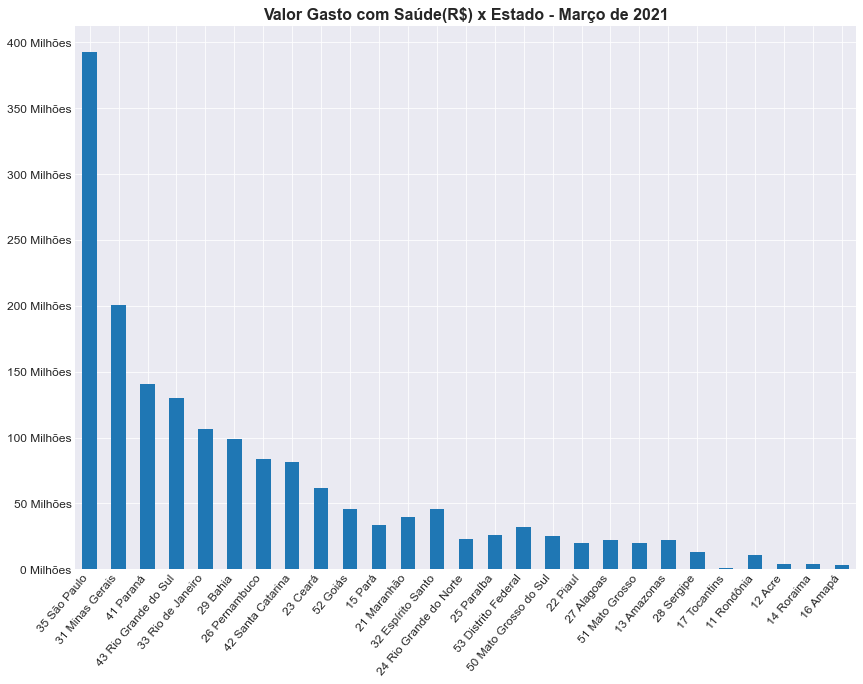

In [18]:
plt.style.use('seaborn-darkgrid')

ax = dados.plot(y="2021/Mar",
           kind="bar", figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.legend().set_visible(False)
ax.set_xticklabels(dados.index.to_list(), rotation = 50, ha="right")

plt.title("Valor Gasto com Saúde(R$) x Estado - Março de 2021", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

Podemos ver que o estado que mais gastou em Março de 2021 foi São Paulo, seguido por Minas Gerais e Paraná. Vamos melhorar esse gráfico ordenando para facilitar nossa leitura.

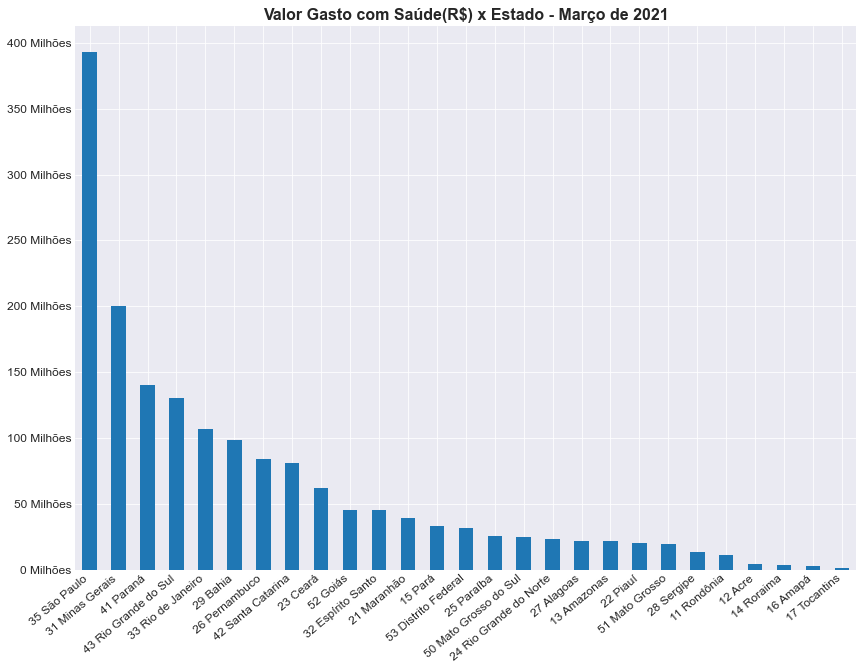

In [19]:
ax = dados["2021/Mar"].sort_values(ascending=False).plot(kind="bar", figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.legend().set_visible(False)
ax.set_xticklabels(dados["2021/Mar"].sort_values(ascending=False).index.to_list(), rotation = 40, ha="right")

plt.title("Valor Gasto com Saúde(R$) x Estado - Março de 2021", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

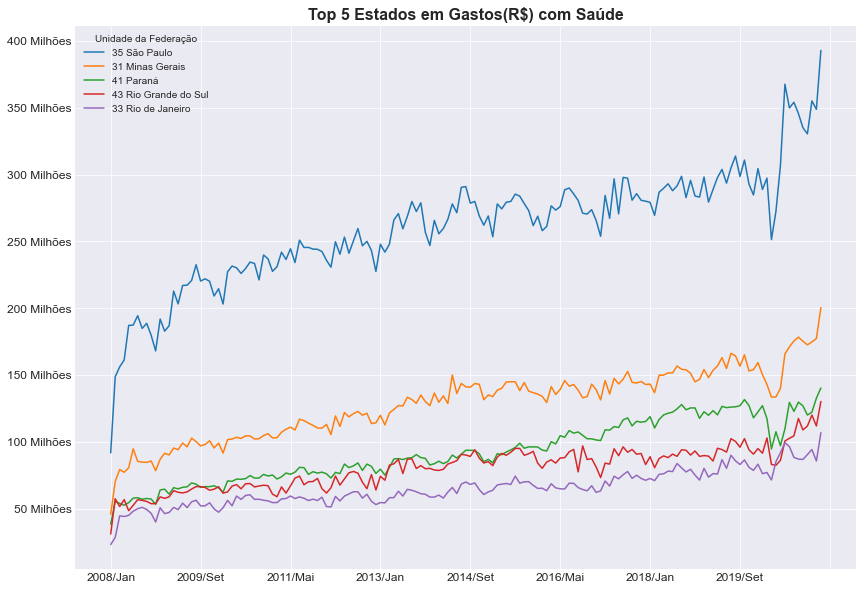

In [20]:
ax = dados.head().T.plot(figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Top 5 Estados em Gastos(R$) com Saúde", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

Pegando os 5 estados com maiores gastos processados em saúde pudemos observar que os gastos tem uma tendência crescente, e aproximadamente em abril e maio de 2020 todos os estados começaram a aumentar perceptivelmente seus gastos, muito provavelmente devido a pandemia de Covid-19.

Agora que fizemos essa análise, talvez seja melhor análisarmos os dados de ano/mês de atendimento ao invés de ano/mês de processamento. O dados relativos ao atendimento refletem ao periódo que o atendimento realmente aconteceu e isso fará mais sentido quando formos comparar com a base de dias de internação.

## Análise Ano/mês de Atendimento

In [21]:
URL = "https://raw.githubusercontent.com/iplusl/Analise-gastos-publico-saude/main/dados/A181829189_28_143_208.csv"
dados_atendimento = pd.read_csv(URL,
                    encoding="ISO-8859-1",
                    skiprows=3, sep=";", skipfooter=12, engine="python",
                    thousands=".", decimal=",")
dados_atendimento

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,-,-,-,-,-,-,-,-,-,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,58448488.85,55118185.83,53827491.88,54679652.99,54026288.42,50271552.33,43743425.74,30186951.00,17173151.55,6591836650.18


In [22]:
dados_atendimento = dados_atendimento.set_index("Unidade da Federação")

In [23]:
dados_atendimento = dados_atendimento.replace("-", np.nan)

In [24]:
dados_atendimento.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [25]:
meses_faltantes = [index for index, value in dados_atendimento.isnull().sum().to_dict().items() if value > 0]
meses_faltantes[0:5]

['1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez', '1994/Jan']

In [26]:
meses_faltantes[-5:]

['2007/Mar', '2007/Abr', '2007/Mai', '2007/Jun', '2007/Jul']

In [27]:
dados_atendimento.isnull().sum().sum()

2955

In [28]:
meses_faltantes+=["2007/Ago", "2007/Set", "2007/Out", "2007/Nov", "2007/Dez"]

Podemos ver que os dados faltantes começam em março de 1992 e vão até março de 2007. Totalizando 2955 dados ausentes, nesse caso não temos muito o que fazer além de eliminar essas colunas, tentar preencher esses dados com algum método pode acabar enviezando o nosso dataset. Para manter o padrão dos dados de processamento vamos pegar os dados a partir de janeiro de 2008.

In [29]:
dados_atendimento = dados_atendimento.drop(meses_faltantes, axis=1)

In [30]:
dados_atendimento.isnull().sum().sum()

0

In [31]:
dados_atendimento = dados_atendimento.astype('float64')

Além disso vamos também ordenar pelo total e depois eliminar a coluna total.

In [32]:
dados_atendimento = dados_atendimento.sort_values("Total", ascending=False)
dados_atendimento = dados_atendimento.drop("Total", axis=1)

In [33]:
dados_atendimento.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,...,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
33 Rio de Janeiro,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48


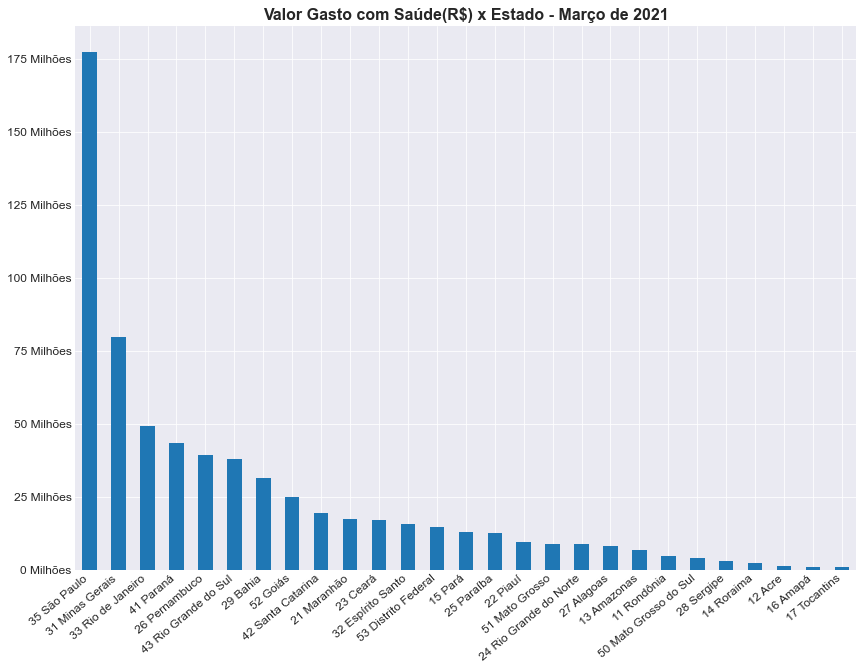

In [34]:
ax = dados_atendimento["2021/Mar"].sort_values(ascending=False).plot(kind="bar", figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.legend().set_visible(False)
ax.set_xticklabels(dados_atendimento["2021/Mar"].sort_values(ascending=False).index.to_list(), rotation = 40, ha="right")

plt.title("Valor Gasto com Saúde(R$) x Estado - Março de 2021", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

Podemos ver que o gráfico é bem diferente do que fizemos com o dataset passado. Enquanto São Paulo processou quase 400 milhões em março de 2021, quando fizemos a análise com os dados de atendimento esse valor caiu para pouco mais de 175 milhões de reais. Essa diferença pode ser pois março era o último mês e pode ser que o mês ainda não tenha sido finalizado contabilmente.

Vamos fazer esses dois gráficos para o mês de fevereiro de 2021 e ver se essa diferença continua.

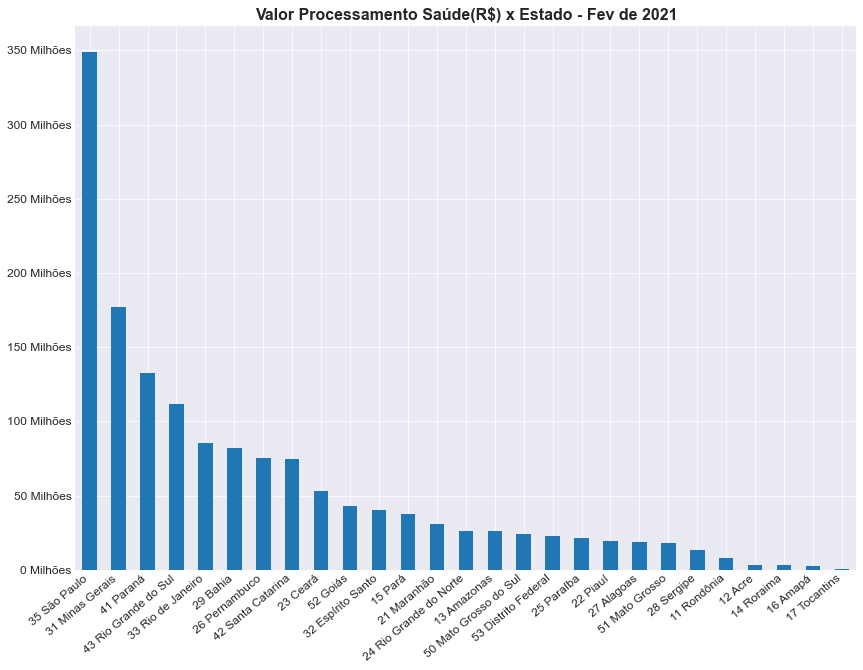

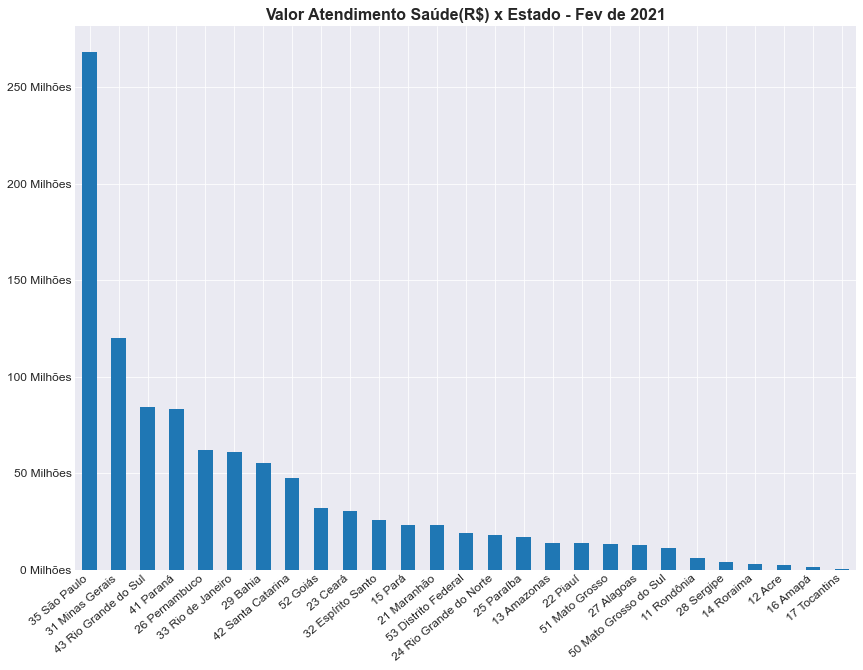

In [35]:
ax = dados["2021/Fev"].sort_values(ascending=False).plot(kind="bar", figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.legend().set_visible(False)
ax.set_xticklabels(dados["2021/Fev"].sort_values(ascending=False).index.to_list(), rotation = 40, ha="right")

plt.title("Valor Processamento Saúde(R$) x Estado - Fev de 2021", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

ax = dados_atendimento["2021/Fev"].sort_values(ascending=False).plot(kind="bar", figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.legend().set_visible(False)
ax.set_xticklabels(dados_atendimento["2021/Fev"].sort_values(ascending=False).index.to_list(), rotation = 40, ha="right")

plt.title("Valor Atendimento Saúde(R$) x Estado - Fev de 2021", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

A diferença caiu, talvez pela hipótese que levantamos mais cedo sobre os dados dos meses de março ainda não estão completos por ser o mês mais recente.

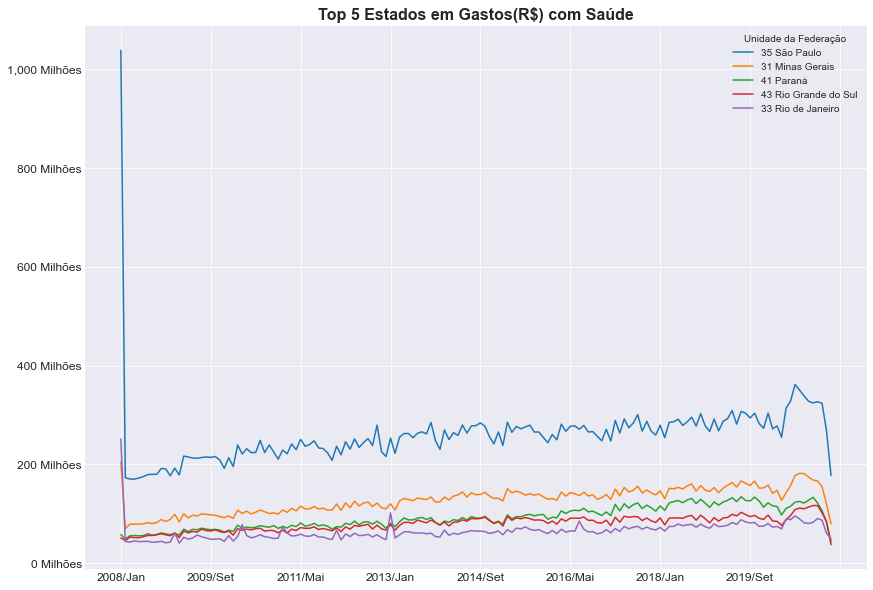

In [36]:
ax = dados_atendimento.head().T.plot(figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Top 5 Estados em Gastos(R$) com Saúde", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

Podemos observar que os gastos de atendimento tem uma tendência crescente, e aproximadamente em abril e maio de 2020 todos os estados começaram a aumentar perceptivelmente seus gastos, muito provavelmente devido a pandemia de Covid-19, um comportamento bem parecido com os gastos processados. Porém, nos dados de atendimentos podemos observar que em janeiro de 2008 todos os estados tiveram um gasto muito elevado e isso se deve provavelmente que em janeiro de 2008 deve ter entrado em vigor alguma lei para que os serviços públicos de saúde começassem a prestar contas. 

## Análise Média de Permanência

In [37]:
URL = "https://raw.githubusercontent.com/iplusl/Analise-gastos-publico-saude/main/dados/A162017189_28_143_208.csv"
media_permanencia = pd.read_csv(URL,
                    encoding="ISO-8859-1",
                    skiprows=3, sep=";", skipfooter=12, engine="python",
                    thousands=".", decimal=",")
media_permanencia

,Unidade da Federação,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,NaN,305.00,NaN,NaN,NaN,NaN,NaN,36.10,12.40,...,4.70,4.70,4.50,4.60,4.40,4.40,4.60,4.50,4.00,4.40
1,12 Acre,337.00,NaN,NaN,NaN,NaN,52.00,NaN,44.60,18.10,...,5.10,4.70,4.50,4.60,4.60,4.90,4.40,4.10,3.10,4.70
2,13 Amazonas,319.30,309.00,NaN,243.00,NaN,NaN,31.00,6.60,8.60,...,5.30,5.40,5.30,5.30,5.30,5.20,5.70,5.10,3.90,5.10
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,307.00,NaN,5.90,16.30,...,5.90,5.90,5.40,5.80,5.80,5.70,6.10,5.70,3.90,5.20
4,15 Pará,325.60,289.80,NaN,NaN,217.00,95.00,101.30,7.50,6.20,...,4.30,4.20,4.10,4.20,4.00,4.10,4.00,3.70,3.20,3.90
5,16 Amapá,NaN,NaN,NaN,NaN,86.00,114.00,18.80,18.10,7.90,...,5.20,5.20,4.80,5.20,4.90,5.40,5.10,4.10,4.20,5.10
6,17 Tocantins,NaN,245.00,NaN,NaN,NaN,121.00,258.00,60.00,9.20,...,4.70,4.50,3.80,3.10,3.70,4.00,3.50,3.40,3.10,4.70
7,21 Maranhão,311.30,308.30,NaN,285.00,171.30,NaN,59.60,8.40,8.50,...,5.00,4.90,4.90,4.70,4.70,4.90,4.70,4.20,3.60,4.60
8,22 Piauí,NaN,310.00,NaN,NaN,128.00,NaN,23.30,16.00,8.70,...,4.90,4.90,4.90,4.90,4.80,4.80,4.40,4.40,3.80,4.50
9,23 Ceará,307.00,343.00,NaN,NaN,NaN,NaN,2.60,6.80,8.80,...,5.80,5.70,5.70,5.60,5.50,5.50,5.40,4.80,3.90,5.40


Aparentente os dados foram lidos corretamente. Como podemos ver, dessa vez os valores faltantes foram lidos como NaN. Vamos ver quantos valores faltantes existem e decidir o que fazer com eles.

In [40]:
media_permanencia = media_permanencia.set_index("Unidade da Federação")

In [41]:
media_permanencia.isnull().sum().sum()

94

Temos alguns dados faltantes, para seguirmos o padrão dos datasets antigos vamos apenas utilizar as colunas de janeiro de 2008 até março de 2021.

In [44]:
meses_faltantes = [index for index, value in media_permanencia.isnull().sum().to_dict().items() if value > 0]
meses_faltantes[0:5]

['2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr', '2007/Mai']

In [45]:
meses_faltantes[-5:]

['2007/Mar', '2007/Abr', '2007/Mai', '2007/Jun', '2007/Jul']

In [46]:
meses_faltantes+=["2007/Ago", "2007/Set", "2007/Out", "2007/Nov", "2007/Dez"]

In [47]:
media_permanencia = media_permanencia.drop(meses_faltantes, axis=1)

In [48]:
media_permanencia.isnull().sum().sum()

0

Pronto, removendo os meses com dados faltantes e deixando apenas o período de janeiro de 2008 até março de 2021 conseguimos eliminar todos os dados faltantes. Vamos agora eliminar a coluna total e fazer algumas análises com gráficos.

In [49]:
media_permanencia = media_permanencia.drop("Total", axis=1)

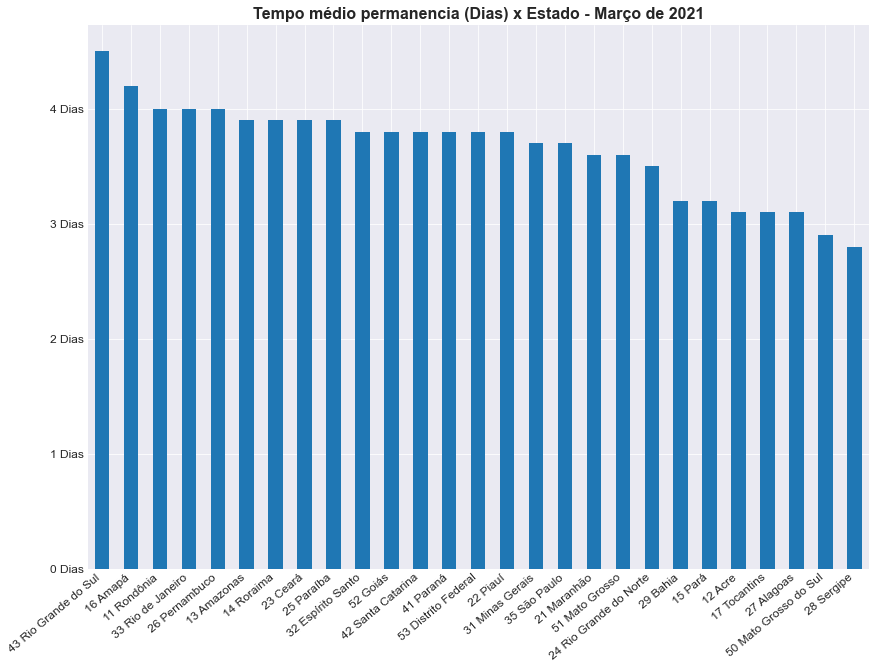

In [53]:
ax = media_permanencia["2021/Mar"].sort_values(ascending=False).plot(kind="bar", figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Dias' for x in ax.get_yticks()])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.legend().set_visible(False)
ax.set_xticklabels(media_permanencia["2021/Mar"].sort_values(ascending=False).index.to_list(), rotation = 40, ha="right")

plt.title("Tempo médio permanencia (Dias) x Estado - Março de 2021", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

Olhando por cima podemos ver que os estados com maior permanência não são os estados com maiores gastos no mês de março, isso pode significar que talvez a correlação entre ambos não seja tão forte assim, vamos pegar os 5 estados com maiores gastos em saúde e ver como a média de permanência se comporta ao longo do tempo.

In [63]:
top5_estados_permanencia = media_permanencia.T[dados[0:5].index.to_list()].T

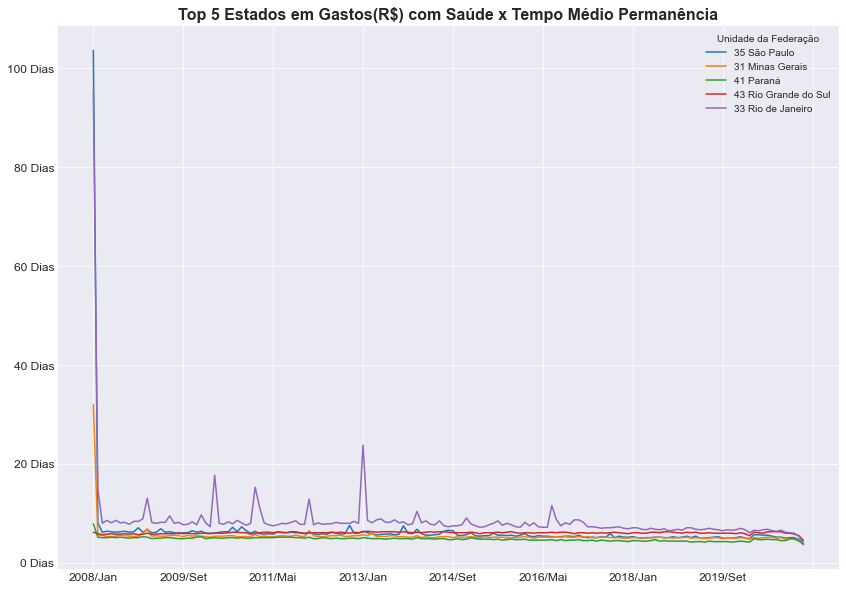

In [67]:
ax = top5_estados_permanencia.T.plot(figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Dias' for x in ax.get_yticks()])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Top 5 Estados em Gastos(R$) com Saúde x Tempo Médio Permanência", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

Os dados de janeiro de 2008 estão atrapalhando a nossa visualização, vamos removê-lo de todos os datasets já que esse foi o primeiro mês.

In [70]:
dados = dados.drop("2008/Jan", axis=1)
dados_atendimento = dados_atendimento.drop("2008/Jan", axis=1)
media_permanencia = media_permanencia.drop("2008/Jan", axis=1)
top5_estados_permanencia = top5_estados_permanencia.drop("2008/Jan", axis=1)

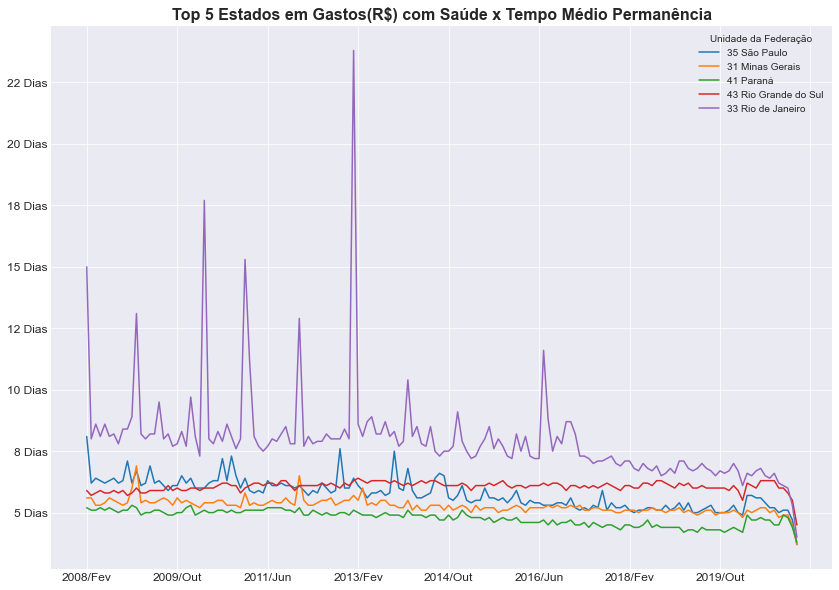

In [71]:
ax = top5_estados_permanencia.T.plot(figsize=(14,10))

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Dias' for x in ax.get_yticks()])
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)

plt.title("Top 5 Estados em Gastos(R$) com Saúde x Tempo Médio Permanência", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("")
plt.show()

Por incrível que pareça, o tempo médio de permanencia tem uma tendência negativa ao lengo do tempo. Inclusive não dá para afirmar que esse número cresceu ou diminuiu expressivamente com relação a pandemia de Covid-19. Também podemos ver que existem alguns picos no gráfico, principalmente no estado de São Paulo, que podem ser explicados ou por um erro no preenchimento dos dados ou que realmente houve algum problema de saúde que conseguiu aumentar o tempo médio de permanência no sistema público de saúde.

Talvez se multiplicarmos esse tempo médio de permanência com o número de leitos possívelmente teriamos um número mais perto do real, e com isso conseguiriamos relacionar ele com o gasto com saúde. Infelizmente no TABNET não tem a informação do número de leitos, mas tem o tempo total de permanência. Vamos analisar esse dataset.

## Análise Dias de Permanência